In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go       
import plotly.express as px  

def get_connection():
    conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=localhost\SQLEXPRESS;'
    'DATABASE=Data_Analysis;'
    'Trusted_Connection=yes;'
    )

    return conn

## Create Tables

In [ ]:
def create_customers_table():
    conn = get_connection()
    cursor = conn.cursor()

    cursor.execute("""
        IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Customers' AND xtype='U')
        CREATE TABLE Customers (
            CustomerID INT IDENTITY(1,1) PRIMARY KEY,
            Name NVARCHAR(100) NOT NULL,
            Gender NVARCHAR(10) CHECK(Gender IN ('Male', 'Female')),
            BirthDate DATE,
            Phone NVARCHAR(20),
            Email NVARCHAR(100) UNIQUE,
            City NVARCHAR(100)
        );
    """)

    conn.commit()
    conn.close()

def create_Branches_table():
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute("""
        IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Branches' AND xtype='U')
        create table Branches(
            BranchesID int IDENTITY(1, 1) primary key,
            BranchName nvarchar(100) unique,
            City nvarchar(100),
            Address nvarchar(250)
            );
    """)
    conn.commit()
    conn.close()


## Insert into Table

In [ ]:
# Insert
def insert_into_Customers():
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute("""
        INSERT INTO Customers (Name, Gender, BirthDate, Phone, Email, City)
        VALUES 
        ('Sara', 'Female', '2001-05-14', '01055678901', 'Sara@gmail.com', 'Alexandria'),
        ('Mohamed', 'Male', '1999-12-02', '01123456789', 'Mohamed@hotmail.com', 'Giza'),
        ('Laila', 'Female', '2003-07-19', '01299887766', 'Laila@yahoo.com', 'Mansoura'),
        ('Omar', 'Male', '2000-09-05', '01577889900', 'Omar@gmail.com', 'Cairo'),
        ('Nour', 'Female', '2002-02-28', '01033445566', 'Nour@outlook.com', 'Tanta'),
        ('Hassan', 'Male', '1998-03-15', '01122334455', 'Hassan@gmail.com', 'Fayoum'),
        ('Mariam', 'Female', '2004-06-30', '01011223344', 'Mariam@gmail.com', 'Aswan'),
        ('Youssef', 'Male', '2001-09-11', '01234567891', 'Youssef@gmail.com', 'Cairo'),
        ('Dina', 'Female', '2000-01-25', '01144556677', 'Dina@yahoo.com', 'Alexandria'),
        ('Khaled', 'Male', '1997-04-12', '01077889911', 'Khaled@hotmail.com', 'Zagazig'),
        ('Reem', 'Female', '2003-03-08', '01299001122', 'Reem@gmail.com', 'Cairo'),
        ('Adel', 'Male', '1996-10-20', '01522334455', 'Adel@outlook.com', 'Port Said'),
        ('Huda', 'Female', '1999-12-31', '01055566677', 'Huda@gmail.com', 'Luxor'),
        ('Mostafa', 'Male', '2002-08-17', '01166778899', 'Mostafa@gmail.com', 'Giza');

    """)
    conn.commit()
    conn.close()

def insert_into_Branches():
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute("""
        INSERT INTO Branches (BranchName, City, Address)
        VALUES
        ('Main Branch', 'Cairo', '12 Tahrir St, Downtown'),
        ('Alex Branch', 'Alexandria', '45 Stanley Rd'),
        ('Giza Branch', 'Giza', '10 Haram St'),
        ('Mansoura Branch', 'Mansoura', '22 El Gomhoria St'),
        ('Tanta Branch', 'Tanta', '8 Saad Zaghloul St'),
        ('Aswan Branch', 'Aswan', '17 Nile Corniche'),
        ('Luxor Branch', 'Luxor', '9 Temple Rd'),
        ('Zagazig Branch', 'Zagazig', '6 University St'),
        ('Fayoum Branch', 'Fayoum', '19 Main Square'),
        ('Port Said Branch', 'Port Said', '11 Port St'),
        ('Ismailia Branch', 'Ismailia', '13 Canal St'),
        ('Sohag Branch', 'Sohag', '25 Nile Rd'),
        ('Beni Suef Branch', 'Beni Suef', '15 City Center'),
        ('Minya Branch', 'Minya', '7 Freedom St'),
        ('Sharm Branch', 'Sharm El-Sheikh', '5 Peace Rd');
    """)
    conn.commit()
    conn.close()
    

## print data 

In [26]:
import pandas as pd

conn = get_connection()

tables = ["Customers", "Branches", "Products", "Sales", "SaleDetails"]

for table in tables:
    print(f"\n===== {table} Table =====")
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    print(df)

conn.close()



===== Customers Table =====
    CustomerID     Name  Gender   BirthDate        Phone                Email  \
0            1    Ahmed    Male  2002-11-23  01086735472      Ahmed@gmail.com   
1            2     Sara  Female  2001-05-14  01055678901       Sara@gmail.com   
2            3  Mohamed    Male  1999-12-02  01123456789  Mohamed@hotmail.com   
3            4    Laila  Female  2003-07-19  01299887766      Laila@yahoo.com   
4            5     Omar    Male  2000-09-05  01577889900       Omar@gmail.com   
5            6     Nour  Female  2002-02-28  01033445566     Nour@outlook.com   
6            7   Hassan    Male  1998-03-15  01122334455     Hassan@gmail.com   
7            8   Mariam  Female  2004-06-30  01011223344     Mariam@gmail.com   
8            9  Youssef    Male  2001-09-11  01234567891    Youssef@gmail.com   
9           10     Dina  Female  2000-01-25  01144556677       Dina@yahoo.com   
10          11   Khaled    Male  1997-04-12  01077889911   Khaled@hotmail.com   

C:\Users\dell\AppData\Local\Temp\ipykernel_3436\805014947.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dell\AppData\Local\Temp\ipykernel_3436\805014947.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dell\AppData\Local\Temp\ipykernel_3436\805014947.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)
C:\Users\dell\AppData\Local\Temp\ipykernel_3436\8050

## print data with API (flask)

In [2]:
from flask import Flask, request, jsonify
import pyodbc
import threading
import time

app = Flask(__name__)

@app.route('/customers', methods= ["GET"])
def get_customers():
    conn = get_connection()  
    cursor = conn.cursor()  
    cursor.execute("SELECT CustomerID, Name, Gender, BirthDate, Phone, Email, City FROM dbo.Customers")  
    rows = cursor.fetchall()  
    conn.close()  

    result = [
        {
            "CustomerID": row.CustomerID,
            "Name": row.Name,
            "Gender": row.Gender,
            "BirthDate": row.BirthDate,
            "Phone": row.Phone,
            "Email": row.Email,
            "City": row.City
        }
        for row in rows
    ]
    return jsonify(result)

@app.route('/customers', methods= ["POST"])
def add_customer():
    data = request.json
    try:
        conn = get_connection()
        cursor = conn.cursor()
        cursor.execute("""
            INSERT INTO dbo.Customers (CustomerID, Name, Gender, BirthDate, Phone, Email, City)
            VALUES (?, ?, ?, ?, ?)
        """, data['CustomerID'], data['Name'], data['Gender'], data['BirthDate'], data['Phone'], data['Email'], data['City'])
        conn.commit() 
        return jsonify({'message': 'Customer added'}), 201 
    except Exception as e:
                return jsonify({'error': str(e)}), 400  
    finally:
        conn.close()

@app.route('/customers/<int:id>', methods=["PUT"])
def update_customer(id):
    data = request.json
    try:
        conn = get_connection()
        cursor = conn.cursor()
        cursor.execute("""
            UPDATE dbo.Customers
            SET Name = ?, Gender = ?, BirthDate = ?, Phone = ?, Email = ?, City = ?
            WHERE CustomerID = ?
        """, data['Name'], data['Gender'], data['BirthDate'], data['Phone'], data['Email'], data['City'], id)
        conn.commit()
        return jsonify({'message': 'customer updated'})
    except Exception as e:
        return jsonify({'error': str(e)}), 400
    finally:
        conn.close()

@app.route('/customers/<int:id>', methods=["DELETE"])
def delete_customer(id):
    try:
        conn = get_connection()
        cursor = conn.cursor()
        cursor.execute("DELETE FROM dbo.Customers WHERE CustomerID = ?", id)
        conn.commit()
        return jsonify({'message': 'customer deleted'})
    except Exception as e:
        return jsonify({'error': str(e)}), 400
    finally:
        conn.close()

def run_flask():
    app.run(port= 5000, debug= False, use_reloader= False)

threading.Thread(target=run_flask).start()
time.sleep(1)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [15/Dec/2025 09:27:56] "GET /customers HTTP/1.1" 200 -


In [3]:
import requests

res = requests.get("http://127.0.0.1:5000/customers")
print("GET:", res.json())

GET: [{'BirthDate': '2002-11-23', 'City': 'Cairo', 'CustomerID': 1, 'Email': 'Ahmed@gmail.com', 'Gender': 'Male', 'Name': 'Ahmed', 'Phone': '01086735472'}, {'BirthDate': '2001-05-14', 'City': 'Alexandria', 'CustomerID': 2, 'Email': 'Sara@gmail.com', 'Gender': 'Female', 'Name': 'Sara', 'Phone': '01055678901'}, {'BirthDate': '1999-12-02', 'City': 'Giza', 'CustomerID': 3, 'Email': 'Mohamed@hotmail.com', 'Gender': 'Male', 'Name': 'Mohamed', 'Phone': '01123456789'}, {'BirthDate': '2003-07-19', 'City': 'Mansoura', 'CustomerID': 4, 'Email': 'Laila@yahoo.com', 'Gender': 'Female', 'Name': 'Laila', 'Phone': '01299887766'}, {'BirthDate': '2000-09-05', 'City': 'Cairo', 'CustomerID': 5, 'Email': 'Omar@gmail.com', 'Gender': 'Male', 'Name': 'Omar', 'Phone': '01577889900'}, {'BirthDate': '2002-02-28', 'City': 'Tanta', 'CustomerID': 6, 'Email': 'Nour@outlook.com', 'Gender': 'Female', 'Name': 'Nour', 'Phone': '01033445566'}, {'BirthDate': '1998-03-15', 'City': 'Fayoum', 'CustomerID': 7, 'Email': 'Hassan

## MongoDB

In [7]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017")
mongo_db = client["Data_Analysis"]

tables = ["Customers", "Branches", "Products", "Sales", "SaleDetails"]

conn = get_connection()

for table in tables:
    df = pd.read_sql(f"select * from {table}", conn)
    data_dict = df.to_dict("records")
    mongo_db[table].insert_many(data_dict)
    print(f"Migrated table {table}")

Migrated table Customers
Migrated table Branches
Migrated table Products
Migrated table Sales
Migrated table SaleDetails


C:\Users\dell\AppData\Local\Temp\ipykernel_4732\2277488051.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"select * from {table}", conn)
C:\Users\dell\AppData\Local\Temp\ipykernel_4732\2277488051.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"select * from {table}", conn)
C:\Users\dell\AppData\Local\Temp\ipykernel_4732\2277488051.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"select * from {table}", conn)
C:\Users\dell\AppData\Local\Temp\ipykernel_473

In [13]:
collection = mongo_db.list_collection_names()

for col_name in collection:
    print(f"\n=== collection {col_name} ===")
    collection = mongo_db[col_name]
    documents = collection.find()

    for doc in documents:
        print(doc)


=== collection Branches ===
{'_id': ObjectId('68fb35867d70dc4fd35f60a8'), 'BranchesID': 1, 'BranchName': 'Main Branch', 'City': 'Cairo', 'Address': '12 Tahrir St, Downtown'}
{'_id': ObjectId('68fb35867d70dc4fd35f60a9'), 'BranchesID': 2, 'BranchName': 'Alex Branch', 'City': 'Alexandria', 'Address': '45 Stanley Rd'}
{'_id': ObjectId('68fb35867d70dc4fd35f60aa'), 'BranchesID': 3, 'BranchName': 'Giza Branch', 'City': 'Giza', 'Address': '10 Haram St'}
{'_id': ObjectId('68fb35867d70dc4fd35f60ab'), 'BranchesID': 4, 'BranchName': 'Mansoura Branch', 'City': 'Mansoura', 'Address': '22 El Gomhoria St'}
{'_id': ObjectId('68fb35867d70dc4fd35f60ac'), 'BranchesID': 5, 'BranchName': 'Tanta Branch', 'City': 'Tanta', 'Address': '8 Saad Zaghloul St'}
{'_id': ObjectId('68fb35867d70dc4fd35f60ad'), 'BranchesID': 6, 'BranchName': 'Aswan Branch', 'City': 'Aswan', 'Address': '17 Nile Corniche'}
{'_id': ObjectId('68fb35867d70dc4fd35f60ae'), 'BranchesID': 7, 'BranchName': 'Luxor Branch', 'City': 'Luxor', 'Addres

## Analysis Requirements & Suitable Charts

##### Top Customers (Highest Spenders)  *`Horizontal Bar Chart`*

C:\Users\dell\AppData\Local\Temp\ipykernel_26604\1219401896.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


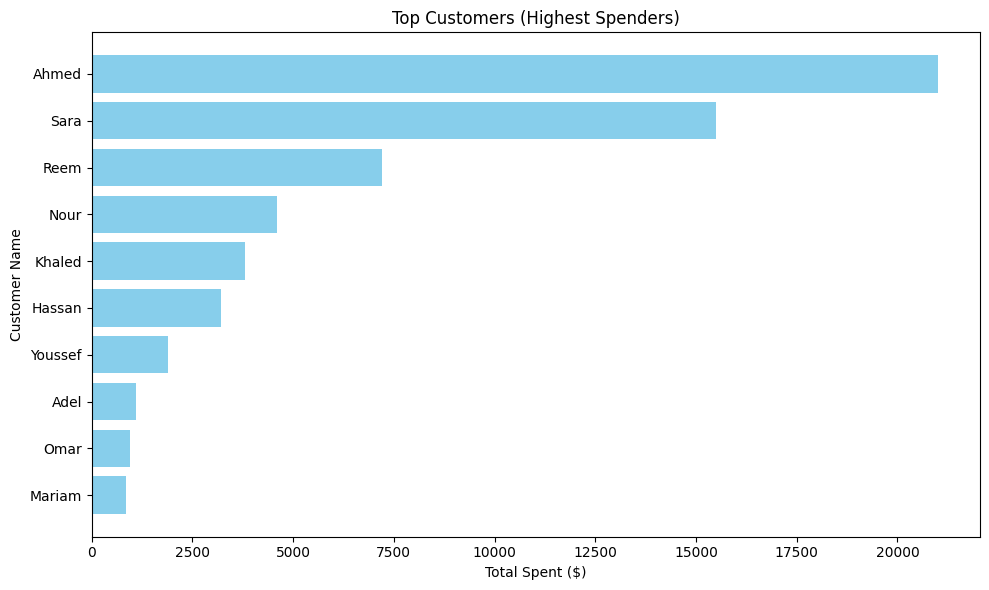

In [3]:
conn = get_connection()
number = input(" What is the number of Customers you would like to view?: ")
query = f"""
SELECT top {number}
    C.Name AS CustomerName,
    SUM(S.TotalAmount) AS TotalSpent
FROM Sales S
JOIN Customers C ON S.CustomerID = C.CustomerID
GROUP BY C.Name
ORDER BY TotalSpent DESC
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 6))
plt.barh(df['CustomerName'], df['TotalSpent'], color='skyblue')
plt.xlabel('Total Spent ($)')
plt.ylabel('Customer Name')
plt.title('Top Customers (Highest Spenders)')
plt.gca().invert_yaxis()  # highest spender on top
plt.tight_layout()
plt.show()

conn.close()

#### Best-Selling Products (Overall)  *`Bar Chart`*


C:\Users\dell\AppData\Local\Temp\ipykernel_26604\3806525216.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


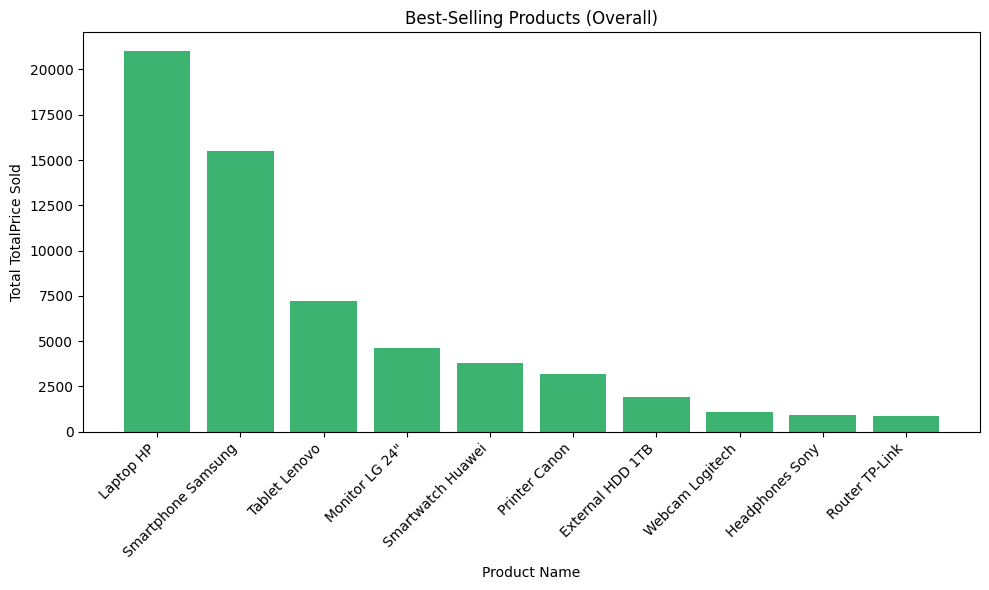

In [4]:
conn = get_connection()
query = """
SELECT TOP 10
    P.ProductName,
    SUM(SD.TotalPrice) AS TotalSold
FROM SaleDetails SD
JOIN Products P ON SD.ProductID = P.ProductID
GROUP BY P.ProductName
ORDER BY TotalSold DESC
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 6))
plt.bar(df['ProductName'], df['TotalSold'], color='mediumseagreen')
plt.xlabel('Product Name')
plt.ylabel('Total TotalPrice Sold')
plt.title('Best-Selling Products (Overall)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

conn.close()

#### Best-Selling Products by Branch  *`Grouped Bar Chart`*

In [20]:
conn = get_connection()
query = """
SELECT TOP 10
    B.BranchName,
    SUM(S.TotalAmount) AS TotalSold
FROM Sales S
JOIN Branches B ON S.BranchID = B.BranchesID
GROUP BY B.BranchName
ORDER BY TotalSold DESC;
"""
df = pd.read_sql(query, conn)

fig = go.Figure()

fig = px.bar(
    df,
    x= df["BranchName"],
    y= df["TotalSold"],
    color= "BranchName",
    text= "TotalSold",
    title= "Best-Selling Products",
    template="plotly_dark"
)

fig.update_traces(textposition= 'outside')
fig.update_layout(
    xaxis_title="Branch Name",
    yaxis_title="TotalSold ($)",
    showlegend=True
)

fig.show()

conn.close()    

C:\Users\dell\AppData\Local\Temp\ipykernel_26604\3282881818.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



#### Branch Comparisons (Revenue)  *`Bar Chart`*

In [24]:
conn = get_connection()
query = """
SELECT
    B.BranchName,
    SUM(S.TotalAmount) AS TotalSold
FROM Sales S
JOIN Branches B ON S.BranchID = B.BranchesID
GROUP BY B.BranchName
ORDER BY TotalSold DESC;
"""
df = pd.read_sql(query, conn)

fig = go.Figure()

fig = px.bar(
    df,
    x= df["BranchName"],
    y= df["TotalSold"],
    color= "TotalSold",
    text= "TotalSold",
    title= "Branch Comparisons",
    template="plotly_dark"
)

fig.update_traces(textposition= 'outside')
fig.update_layout(
    xaxis_title="Branch Name",
    yaxis_title="TotalSold ($)",
    showlegend=True
)

fig.show()

conn.close()    

C:\Users\dell\AppData\Local\Temp\ipykernel_26604\827422756.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



#### Time Analysis (Monthly/Seasonal Trends)  *`Line Chart`*

In [2]:
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017')
mongo_db = client['Data_Analysis']

collection = mongo_db['Customers']

for doc in collection.find():
    print(doc)

{'_id': ObjectId('68fb35867d70dc4fd35f6099'), 'CustomerID': 1, 'Name': 'Ahmed', 'Gender': 'Male', 'BirthDate': '2002-11-23', 'Phone': '01086735472', 'Email': 'Ahmed@gmail.com', 'City': 'Cairo'}
{'_id': ObjectId('68fb35867d70dc4fd35f609a'), 'CustomerID': 2, 'Name': 'Sara', 'Gender': 'Female', 'BirthDate': '2001-05-14', 'Phone': '01055678901', 'Email': 'Sara@gmail.com', 'City': 'Alexandria'}
{'_id': ObjectId('68fb35867d70dc4fd35f609b'), 'CustomerID': 3, 'Name': 'Mohamed', 'Gender': 'Male', 'BirthDate': '1999-12-02', 'Phone': '01123456789', 'Email': 'Mohamed@hotmail.com', 'City': 'Giza'}
{'_id': ObjectId('68fb35867d70dc4fd35f609c'), 'CustomerID': 4, 'Name': 'Laila', 'Gender': 'Female', 'BirthDate': '2003-07-19', 'Phone': '01299887766', 'Email': 'Laila@yahoo.com', 'City': 'Mansoura'}
{'_id': ObjectId('68fb35867d70dc4fd35f609d'), 'CustomerID': 5, 'Name': 'Omar', 'Gender': 'Male', 'BirthDate': '2000-09-05', 'Phone': '01577889900', 'Email': 'Omar@gmail.com', 'City': 'Cairo'}
{'_id': ObjectId(

In [11]:
result = collection.find({'City': 'Cairo'})

for person in result:
    print(person['Name'], person['Email'])

Ahmed Ahmed@gmail.com
Omar Omar@gmail.com
Youssef Youssef@gmail.com
Reem Reem@gmail.com


In [37]:
sales = pd.DataFrame(list(mongo_db['Sales'].find()))
details = pd.DataFrame(list(mongo_db['SaleDetails'].find()))

df = details.merge(sales, on= 'SaleID')

df['Date'] = pd.to_datetime(df['SaleDate'])
df["Day"] = df["Date"].dt.to_period("D")
days = df.groupby("Day")["TotalAmount"].sum()

fig = go.Figure()
fig = px.line(
    days,
    x=days.index.astype(str),
    y=days.values,
    markers=True,
    title="Monthly Sales Trend",
    template="plotly_dark"
)

fig.update_layout(xaxis_title="Month", yaxis_title="Total Sales")
fig.show()

this happend because my dates are : 

In [30]:
collection = mongo_db['Sales']

for doc in collection.find():
    print(doc['SaleDate'])

2024-01-02
2024-01-03
2024-01-04
2024-01-05
2024-01-06
2024-01-07
2024-01-08
2024-01-09
2024-01-10
2024-01-11
2024-01-12
2024-01-13
2024-01-14
2024-01-15
2024-01-16


#### Seasonal Product Demand *`Multi-Line Chart, Heatmap`*

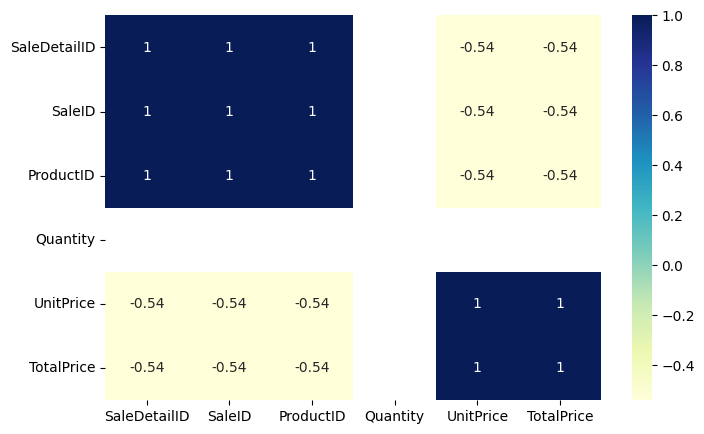

In [48]:
df = pd.DataFrame(list(mongo_db['SaleDetails'].find()))
corr = df.corr(numeric_only= True)

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

#### Stock Planning (Branch Needs) *`Scatter Plot`*

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go       
import plotly.express as px  

def get_connection():
    conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=DESKTOP-MA33VD7\AHMED;'
    'DATABASE=Data_Analysis;'
    'Trusted_Connection=yes;'
    )

    return conn

In [2]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import pyodbc

app = FastAPI()

@app.get("/stock-planning/scatter")
def stock_planning_scatter():
    try:
        conn = get_connection()

        query = """
        SELECT 
            b.BranchName,
            p.ProductName,
            SUM(sd.Quantity) AS TotalQuantity
        FROM Sales s
        JOIN SaleDetails sd ON s.SaleID = sd.SaleID
        JOIN Products p ON sd.ProductID = p.ProductID
        JOIN Branches b ON s.BranchID = b.BranchID
        GROUP BY b.BranchName, p.ProductName
        """

        df = pd.read_sql(query, conn)

        fig = px.scatter(
            df,
            x="BranchName",
            y="TotalQuantity",
            color="ProductName",
            size="TotalQuantity",
            title="Stock Planning – Branch Needs",
            labels={
                "BranchName": "Branch",
                "TotalQuantity": "Total Sold Quantity"
            }
        )

        return fig.to_dict()

    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

    finally:
        conn.close()

In [ ]:
import nest_asyncio
from uvicorn import Config, Server

nest_asyncio.apply()

server = Server(Config(app=app, host="127.0.0.1", port=8000))
await server.serve()

INFO:     Started server process [18772]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


In [ ]:
import requests

res = requests.get("http://127.0.0.1:8000/stock-planning/scatter")
print("GET:", res.json())

In [1]:
from flask import Flask, jsonify
import pyodbc
import pandas as pd
import plotly.express as px
import threading
import time

app = Flask(__name__)

def get_connection():
    return pyodbc.connect(
        'DRIVER={SQL Server};'
        'SERVER=DESKTOP-MA33VD7\\AHMED;'
        'DATABASE=Data_Analysis;'
        'Trusted_Connection=yes;'
    )

@app.route("/stock-planning", methods=["GET"])
def stock_planning():
    try:
        conn = get_connection()

        query = """
        SELECT 
            b.BranchName,
            p.ProductName,
            SUM(sd.Quantity) AS TotalQuantity
        FROM Sales s
        JOIN SaleDetails sd ON s.SaleID = sd.SaleID
        JOIN Products p ON sd.ProductID = p.ProductID
        JOIN Branches b ON s.BranchID = b.BranchID
        GROUP BY b.BranchName, p.ProductName
        """

        df = pd.read_sql(query, conn)

        fig = px.scatter(
            df,
            x="ProductName",
            y="TotalQuantity",
            color="BranchName",
            size="TotalQuantity",
            title="Stock Planning – Branch Needs",
            labels={
                "ProductName": "Product",
                "TotalQuantity": "Total Quantity Sold",
                "BranchName": "Branch"
            }
        )

        return fig.to_json()

    except Exception as e:
        return jsonify({"error": str(e)}), 400

    finally:
        conn.close()

def run_flask():
    app.run(port= 5000, debug= False, use_reloader= False)

threading.Thread(target=run_flask).start()
time.sleep(1)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\dell\AppData\Local\Temp\ipykernel_13612\268030071.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
127.0.0.1 - - [15/Dec/2025 10:14:40] "GET /stock-planning HTTP/1.1" 400 -


In [3]:
import requests

res = requests.get("http://127.0.0.1:5000/stock-planning")
print("GET:", res.json())

GET: {'error': 'Execution failed on sql \'\n        SELECT \n            b.BranchName,\n            p.ProductName,\n            SUM(sd.Quantity) AS TotalQuantity\n        FROM Sales s\n        JOIN SaleDetails sd ON s.SaleID = sd.SaleID\n        JOIN Products p ON sd.ProductID = p.ProductID\n        JOIN Branches b ON s.BranchID = b.BranchID\n        GROUP BY b.BranchName, p.ProductName\n        \': (\'42S22\', "[42S22] [Microsoft][ODBC SQL Server Driver][SQL Server]Invalid column name \'BranchID\'. (207) (SQLExecDirectW)")'}
